<a href="https://colab.research.google.com/github/Indhusaikar/My-QC/blob/main/Q_hand_on_practice_chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Listing 4.1: Load the raw data
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/train.csv')

Towards Naïve Bayes

In [3]:
# Listing 4.2: Calculating the probability to survive the Titanic shipwreck
# list of all survivors
survivors =  train[train.Survived.eq(1)]

# calculate the probability
prob_survival = len(survivors)/len(train)
print('P(Survival) is {:.2f}'.format(prob_survival))

P(Survival) is 0.38


In [4]:
# Listing 4.3: Calculating the probability to survive if the passenger had asecond‐class ticket
# list of all passengers with a second class ticket
secondclass = train[train.Pclass.eq(2)]

prob_survival_secondclass = len(secondclass[secondclass.Survived.eq(1)])/len(secondclass)
print('P(Survived|SecondClass) is {:.2f}'.format(prob_survival_secondclass))

P(Survived|SecondClass) is 0.47


In [5]:
# Listing 4.4: Calculating the probability to survive if the passenger was female
#list of all females
females = train[train.Sex.eq("female")]

prob_survival_female = len(females[females.Survived.eq(1)])/len(females)
print('P(Survived|Female) is {:.2f}'.format(prob_survival_female))

P(Survived|Female) is 0.74


In [6]:
# Listing 4.5: Calculating the probability to survive if the passenger was female andhad a second‐class ticket
#list of all females with a second class ticket
secondclass_female = secondclass[secondclass.Sex.eq("female")]
prob_survival_secondclass_female = len(secondclass_female[secondclass_female.Survived.eq(1)])/len(secondclass_female)
print('P(Survived|SecondClass,Female) is {:.2f}'.format(prob_survival_secondclass_female))

P(Survived|SecondClass,Female) is 0.92


In [7]:
# Listing 4.6: Counting passengers
print('There are {} female passengers the dataset'.format(len(females)))
print('There are {} passengers with a second-class ticket in the dataset'.format(len(secondclass)))
print('There are {} female passengers with a second-class ticket in\nthe dataset'.format(len(secondclass_female)))

There are 314 female passengers the dataset
There are 184 passengers with a second-class ticket in the dataset
There are 76 female passengers with a second-class ticket in
the dataset


 Bayes' Theorem

In [8]:
# Listing 4.7: Calculating the posterior probability
# calculate the backwards probability of a survivor having a
# second-class ticket
p_surv_seccl = len(survivors[survivors.Pclass.eq(2)])/len(survivors)

# calculate the modifier and the informativeness of the second-class ticket
m_seccl = p_surv_seccl / (len(secondclass)/len(train))
i_seccl = abs(m_seccl-1)
print('The modifier of the second-class ticket is {:.2f}.\nThe informativeness is {:.2f}'.format(m_seccl, i_seccl))

# calculate the backwards probability of a survivor being female
p_surv_female = len(survivors[survivors.Sex.eq("female")])/len(survivors)

# calculate the modifier and the informativeness of being female
m_female = p_surv_female / (len(females)/len(train))
i_female = abs(m_female-1)
print('The modifier of being female is {:.2f}.\nThe informativeness is {:.2f}'.format(m_female,i_female))

# calculate the posterior probability
posterior = m_seccl * m_female * prob_survival
print('\nP(Survived|SecondClass,Female) is {:.2f}'.format(posterior))

The modifier of the second-class ticket is 1.23.
The informativeness is 0.23
The modifier of being female is 1.93.
The informativeness is 0.93

P(Survived|SecondClass,Female) is 0.91


<Axes: >

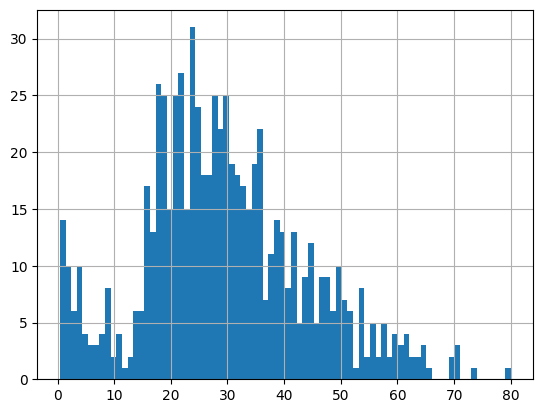

In [9]:
# Listing 4.8: The actual distribution of the passenger age
train["Age"].hist(bins=80)

In [10]:
# Listing 4.9: Calculating the mean and the standard deviation of the passenger age
age_mean = train["Age"].mean()
age_std = train["Age"].std()
print('The average passenger age is {:.1f}. The standard deviation is {:.1f}'.format(age_mean, age_std))

The average passenger age is 29.7. The standard deviation is 14.5


In [11]:
# Listing 4.10: Calculating modifier and informativenesses of the age of 29
from math import exp, sqrt, pi

def density(mu,sigma,age):
    return 1/(sigma*sqrt(2*pi))*exp(-0.5*((age-mu)/sigma)**2)

survivor_age_mean = survivors["Age"].mean()
survivor_age_std = survivors["Age"].std()
print('The average survivor age is {:.1f}. The standard deviation is {:.1f}'.format(survivor_age_mean, survivor_age_std))

# calculate the Informativeness of the age of 29
p_surv_age29 = density(survivor_age_mean, survivor_age_std, 29)
p_age29 = density(age_mean, age_std, 29)
m_age29 = p_surv_age29 / p_age29
i_age29 = abs(m_age29-1)
print('The modifier of the age of 29 is {:.2f}.'.format(m_age29))
print('Its informativeness is {:.2f}.'.format(i_age29))

The average survivor age is 28.3. The standard deviation is 15.0
The modifier of the age of 29 is 0.97.
Its informativeness is 0.03.


In [12]:
# Listing 4.11: Calculating informativenesses of other ages
# calculate the Informativeness of the age of 70
p_surv_age70 = density(survivor_age_mean, survivor_age_std, 70)
p_age70 = density(age_mean, age_std, 70)
m_age70 = p_surv_age70 / p_age70
i_age70 = abs(m_age70-1)
print('The modifier of the age of 70 is {:.2f}.'.format(m_age70))
print('Its informativeness is {:.2f}.\n'.format(i_age70))

# calculate the Informativeness of the age of 5
p_surv_age5 = density(survivor_age_mean, survivor_age_std, 5)
p_age5 = density(age_mean, age_std, 5)
m_age5 = p_surv_age5 / p_age5
i_age5 = abs(m_age5-1)
print('The modifier of the age of 5 is {:.2f}.'.format(m_age5))
print('Its informativeness is {:.2f}.'.format(i_age5))

The modifier of the age of 70 is 0.94.
Its informativeness is 0.06.

The modifier of the age of 5 is 1.22.
Its informativeness is 0.22.
